In [2]:
import csv
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.metrics import *
from math import sqrt
from tqdm import tqdm
from sklearn import linear_model
from boruta import BorutaPy
from sklearn.model_selection import train_test_split
from tsfresh import extract_features
from tsfresh.utilities.dataframe_functions import make_forecasting_frame
from tsfresh.utilities.dataframe_functions import impute
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from mlxtend.feature_selection import ExhaustiveFeatureSelector as EFS
from sklearn.ensemble import RandomForestRegressor
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs

C:\Users\gaurang\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [4]:
Data = pd.DataFrame.from_csv('normalizedData.csv')

In [5]:
Data

,Appliances,lights,temp_kitchen,hum_kitchen,temp_living,hum_living,temp_laundry,hum_laundry,temp_office,hum_office,...,Num_sec_midnight,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,WeekDay,Weekend
date,,,,,,,,,,,,,,,,,,,,,
2016-01-11 17:00:00,60,3.301180,-1.118616,1.843774,-0.520398,1.073656,-1.235032,1.686087,-0.908194,1.506399,...,-0.007118,-0.410408,2.470571,-0.401176,-0.401176,-0.413353,-0.413353,-0.413353,0.619379,0.0
2016-01-11 17:10:00,60,3.301180,-1.118616,1.616766,-0.520398,1.057071,-1.235032,1.704523,-0.908194,1.604488,...,140.474197,-0.410408,2.470571,-0.401176,-0.401176,-0.413353,-0.413353,-0.413353,0.619379,0.0
2016-01-11 17:20:00,50,3.301180,-1.118616,1.517921,-0.520398,1.033523,-1.235032,1.748563,-0.944091,1.580878,...,-0.007118,-0.410408,2.470571,-0.401176,-0.401176,-0.413353,-0.413353,-0.413353,0.619379,0.0
2016-01-11 17:30:00,50,4.561263,-1.118616,1.459284,-0.520398,1.024514,-1.235032,1.769047,-0.962039,1.542487,...,-0.007118,-0.410408,2.470571,-0.401176,-0.401176,-0.413353,-0.413353,-0.413353,0.619379,0.0
2016-01-11 17:40:00,60,4.561263,-1.118616,1.526298,-0.520398,1.009771,-1.235032,1.769047,-0.962039,1.497953,...,-0.007118,-0.410408,2.470571,-0.401176,-0.401176,-0.413353,-0.413353,-0.413353,0.619379,0.0
2016-01-11 17:50:00,50,4.561263,-1.118616,1.449232,-0.520398,1.002400,-1.235032,1.748563,-0.962039,1.544022,...,-0.007118,-0.410408,2.470571,-0.401176,-0.401176,-0.413353,-0.413353,-0.413353,0.619379,0.0
2016-01-11 18:00:00,60,5.821345,-1.118616,1.383894,-0.520398,1.002400,-1.235032,1.738321,-0.962039,1.557843,...,-0.007118,-0.410408,2.470571,-0.401176,-0.401176,-0.413353,-0.413353,-0.413353,0.619379,0.0
2016-01-11 18:10:00,60,5.821345,-1.139371,1.331958,-0.520398,1.002400,-1.264941,1.738321,-0.962039,1.574735,...,-0.007118,-0.410408,2.470571,-0.401176,-0.401176,-0.413353,-0.413353,-0.413353,0.619379,0.0
2016-01-11 18:20:00,60,4.561263,-1.180880,1.341382,-0.520398,0.986019,-1.264941,1.704523,-0.962039,1.557843,...,-0.007118,-0.410408,2.470571,-0.401176,-0.401176,-0.413353,-0.413353,-0.413353,0.619379,0.0


In [6]:
train = pd.DataFrame.from_csv("train.csv")
test = pd.DataFrame.from_csv("test.csv")
X_train = train.iloc[:,:len(train.columns)-1]
y_train = train.iloc[:,len(train.columns)-1]
X_test = test.iloc[:,:len(test.columns)-1]
y_test = test.iloc[:,len(test.columns)-1]

In [7]:
X = Data.iloc[:,1:len(Data.columns)]
Y = Data.iloc[:,0]

# Sequential Forward Selection of feature in RandomForest

In [ ]:
regressor = RandomForestRegressor(n_estimators=100)
sfs1 = SFS(regressor,
           k_features=15,
           forward=True, 
           floating=False,n_jobs=2,
           scoring='r2', verbose = 2,
           cv=10)
sfs1 = sfs1.fit(X.as_matrix(), Y.as_matrix())

In [ ]:
sfs1.subsets_

In [14]:
sfs1.k_score_

-0.1371853665157346

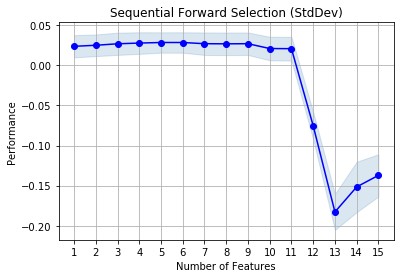

In [16]:
fig = plot_sfs(sfs1.get_metric_dict(), kind='std_err')
plt.title('Sequential Forward Selection (StdDev)')
plt.grid()
plt.show()

In [ ]:
sfs1 = SFS(regressor,
           k_features=15,
           forward=True, 
           floating=False,
           scoring='neg_mean_squared_error',
           n_jobs=4,
           cv=0)
sfs1 = sfs1.fit(X_train.as_matrix(), y_train.as_matrix())

In [363]:
sfs1.subsets_

{1: {'avg_score': -5294.7340941696875,
  'cv_scores': array([-5294.73409417]),
  'feature_idx': (11,)},
 2: {'avg_score': -1518.7755708989059,
  'cv_scores': array([-1518.7755709]),
  'feature_idx': (11, 13)},
 3: {'avg_score': -771.91534428496198,
  'cv_scores': array([-771.91534428]),
  'feature_idx': (11, 13, 19)},
 4: {'avg_score': -625.70875548949391,
  'cv_scores': array([-625.70875549]),
  'feature_idx': (11, 13, 19, 24)},
 5: {'avg_score': -591.7914046348219,
  'cv_scores': array([-591.79140463]),
  'feature_idx': (8, 11, 13, 19, 24)},
 6: {'avg_score': -578.06608877778524,
  'cv_scores': array([-578.06608878]),
  'feature_idx': (8, 11, 13, 18, 19, 24)},
 7: {'avg_score': -571.12556043510574,
  'cv_scores': array([-571.12556044]),
  'feature_idx': (6, 8, 11, 13, 18, 19, 24)},
 8: {'avg_score': -565.98645361799868,
  'cv_scores': array([-565.98645362]),
  'feature_idx': (6, 8, 11, 13, 18, 19, 20, 24)},
 9: {'avg_score': -566.88188365650967,
  'cv_scores': array([-566.88188366]),

In [364]:
sfs1.k_score_

-560.80466319843254

C:\Users\gaurang\Anaconda3\lib\site-packages\numpy\core\_methods.py:135: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
C:\Users\gaurang\Anaconda3\lib\site-packages\numpy\core\_methods.py:127: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


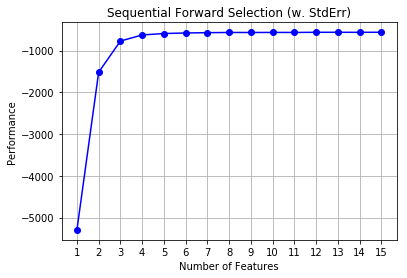

In [365]:
fig = plot_sfs(sfs1.get_metric_dict(), kind='std_err')
plt.title('Sequential Forward Selection (w. StdErr)')
plt.grid()
plt.show()

# Sequential Backward Selection of feature in RandomForest

In [357]:
sfs2 = SFS(regressor,
           k_features=15,
           forward=False, 
           floating=False,
           scoring='r2',
           n_jobs=4,
           cv=0)
sfs2 = sfs2.fit(X_train.as_matrix(), y_train.as_matrix())

In [359]:
sfs2.subsets_

{15: {'avg_score': 0.94520994012710824,
  'cv_scores': array([ 0.94520994]),
  'feature_idx': (1, 6, 7, 8, 10, 11, 12, 15, 17, 18, 19, 20, 21, 23, 24)},
 16: {'avg_score': 0.94483562706071,
  'cv_scores': array([ 0.94483563]),
  'feature_idx': (1, 3, 6, 7, 8, 10, 11, 12, 15, 17, 18, 19, 20, 21, 23, 24)},
 17: {'avg_score': 0.9450571120268183,
  'cv_scores': array([ 0.94505711]),
  'feature_idx': (1,
   3,
   6,
   7,
   8,
   10,
   11,
   12,
   14,
   15,
   17,
   18,
   19,
   20,
   21,
   23,
   24)},
 18: {'avg_score': 0.94474824034392679,
  'cv_scores': array([ 0.94474824]),
  'feature_idx': (1,
   3,
   6,
   7,
   8,
   10,
   11,
   12,
   14,
   15,
   17,
   18,
   19,
   20,
   21,
   22,
   23,
   24)},
 19: {'avg_score': 0.94471062995836264,
  'cv_scores': array([ 0.94471063]),
  'feature_idx': (1,
   3,
   6,
   7,
   8,
   10,
   11,
   12,
   13,
   14,
   15,
   17,
   18,
   19,
   20,
   21,
   22,
   23,
   24)},
 20: {'avg_score': 0.94423713223142602,
  'cv_scor

In [360]:
sfs2.k_score_

0.94520994012710824

C:\Users\gaurang\Anaconda3\lib\site-packages\numpy\core\_methods.py:135: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
C:\Users\gaurang\Anaconda3\lib\site-packages\numpy\core\_methods.py:127: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


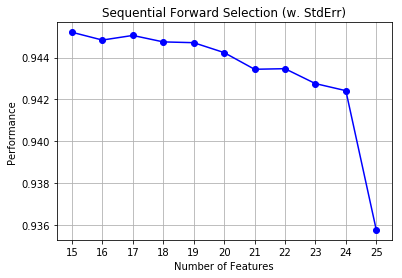

In [361]:
fig = plot_sfs(sfs2.get_metric_dict(), kind='std_err')
plt.title('Sequential Backward Selection (w. StdErr)')
plt.grid()
plt.show()

# Feature Selection using TPOT

In [19]:
from tpot import TPOTRegressor
my_tpot = TPOTRegressor(generations=50, population_size=1000,n_jobs=8, early_stop=5, offspring_size=600, verbosity=2, config_dict='TPOT light')  
result = my_tpot.fit(X_train, y_train)  

Generation 1 - Current best internal CV score: -6166.952302793087


Generation 2 - Current best internal CV score: -5980.126525587899


Generation 3 - Current best internal CV score: -5980.126525587899


Generation 4 - Current best internal CV score: -5551.999825036415


Generation 5 - Current best internal CV score: -5551.999825036415


Generation 6 - Current best internal CV score: -5551.999825036415


Generation 7 - Current best internal CV score: -5428.576945747855


Generation 8 - Current best internal CV score: -5428.576945747855


Generation 9 - Current best internal CV score: -5428.576945747855


Generation 10 - Current best internal CV score: -5354.586504691115


Generation 11 - Current best internal CV score: -5022.405255758661


Generation 12 - Current best internal CV score: -5022.405255758661


Generation 13 - Current best internal CV score: -5022.405255758661


Generation 14 - Current best internal CV score: -5022.405255758661


Generation 15 - Current best internal CV score: -5022.405255758661


Generation 16 - Current best internal CV score: -4819.139039048174


Generation 17 - Current best internal CV score: -4819.139039048174


Generation 18 - Current best internal CV score: -4819.139039048174


Generation 19 - Current best internal CV score: -4819.139039048174


Generation 20 - Current best internal CV score: -4819.139039048174


Generation 21 - Current best internal CV score: -4819.139039048174


Generation 22 - Current best internal CV score: -4819.139039048174


Generation 23 - Current best internal CV score: -4819.139039048174


Generation 24 - Current best internal CV score: -4800.570464537618


Generation 25 - Current best internal CV score: -4800.570464537618


Generation 26 - Current best internal CV score: -4800.570464537618


Generation 27 - Current best internal CV score: -4800.570464537618


Generation 28 - Current best internal CV score: -4800.570464537618


Generation 29 - Current best internal CV score: -4800.570464537618


Generation 30 - Current best internal CV score: -4709.588483902887


Generation 31 - Current best internal CV score: -4709.588483902887


Generation 32 - Current best internal CV score: -4709.588483902887


Generation 33 - Current best internal CV score: -4709.588483902887


Generation 34 - Current best internal CV score: -4709.588483902887


Generation 35 - Current best internal CV score: -4709.588483902887


Generation 36 - Current best internal CV score: -4709.588483902887


Generation 37 - Current best internal CV score: -4709.588483902887


Generation 38 - Current best internal CV score: -4709.588483902887


The optimized pipeline was not improved after evaluating 5 more generations. Will end the optimization process.

TPOT closed prematurely. Will use the current best pipeline.



Best pipeline: KNeighborsRegressor(RobustScaler(Normalizer(input_matrix, norm=l2)), n_neighbors=2, p=1, weights=distance)


In [21]:
print(my_tpot.score(X_test, y_test))

-3828.21616094


In [22]:
my_tpot.export('tpot_light_pipeline.py')

True

# RandomForest using TSFresh feature selection

In [12]:
df_shift, y = make_forecasting_frame(Data["Appliances"], kind="Watts", max_timeshift=10, rolling_direction=1)
X = extract_features(df_shift, column_id="id", column_sort="time", column_value="value",show_warnings=False, impute_function=impute)
X

Feature Extraction: 100%|██████████████████████████████████████████████████████████████| 20/20 [10:00<00:00, 30.03s/it]
 'value__agg_linear_trend__f_agg_"max"__chunk_len_10__attr_"rvalue"'
 'value__agg_linear_trend__f_agg_"max"__chunk_len_10__attr_"slope"'
 'value__agg_linear_trend__f_agg_"max"__chunk_len_10__attr_"stderr"'
 'value__agg_linear_trend__f_agg_"max"__chunk_len_50__attr_"intercept"'
 'value__agg_linear_trend__f_agg_"max"__chunk_len_50__attr_"rvalue"'
 'value__agg_linear_trend__f_agg_"max"__chunk_len_50__attr_"slope"'
 'value__agg_linear_trend__f_agg_"max"__chunk_len_50__attr_"stderr"'
 'value__agg_linear_trend__f_agg_"mean"__chunk_len_10__attr_"intercept"'
 'value__agg_linear_trend__f_agg_"mean"__chunk_len_10__attr_"rvalue"'
 'value__agg_linear_trend__f_agg_"mean"__chunk_len_10__attr_"slope"'
 'value__agg_linear_trend__f_agg_"mean"__chunk_len_10__attr_"stderr"'
 'value__agg_linear_trend__f_agg_"mean"__chunk_len_50__attr_"intercept"'
 'value__agg_linear_trend__f_agg_"mean"__

 'value__spkt_welch_density__coeff_8'] did not have any finite values. Filling with zeros.


variable,value__abs_energy,value__absolute_sum_of_changes,"value__agg_autocorrelation__f_agg_""mean""","value__agg_autocorrelation__f_agg_""median""","value__agg_autocorrelation__f_agg_""var""","value__agg_linear_trend__f_agg_""max""__chunk_len_10__attr_""intercept""","value__agg_linear_trend__f_agg_""max""__chunk_len_10__attr_""rvalue""","value__agg_linear_trend__f_agg_""max""__chunk_len_10__attr_""slope""","value__agg_linear_trend__f_agg_""max""__chunk_len_10__attr_""stderr""","value__agg_linear_trend__f_agg_""max""__chunk_len_50__attr_""intercept""",...,value__time_reversal_asymmetry_statistic__lag_1,value__time_reversal_asymmetry_statistic__lag_2,value__time_reversal_asymmetry_statistic__lag_3,value__value_count__value_-inf,value__value_count__value_0,value__value_count__value_1,value__value_count__value_inf,value__value_count__value_nan,value__variance,value__variance_larger_than_standard_deviation
id,,,,,,,,,,,,,,,,,,,,,
2016-01-11 17:10:00,3600.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
2016-01-11 17:20:00,7200.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
2016-01-11 17:30:00,9700.0,10.0,-0.625000,-0.625000,0.140625,0.0,0.0,0.0,0.0,0.0,...,-66000.0,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.0,0.0,22.222222,1.0
2016-01-11 17:40:00,12200.0,10.0,-0.555556,-1.000000,0.395062,0.0,0.0,0.0,0.0,0.0,...,-60500.0,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.0,0.0,25.000000,1.0
2016-01-11 17:50:00,15800.0,20.0,-0.114583,-0.062500,0.355360,0.0,0.0,0.0,0.0,0.0,...,-22000.0,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.0,0.0,24.000000,1.0
2016-01-11 18:00:00,18300.0,30.0,-0.273333,-0.200000,0.205511,0.0,0.0,0.0,0.0,0.0,...,-16500.0,-2.750000e+04,0.000000e+00,0.0,0.0,0.0,0.0,0.0,25.000000,1.0
2016-01-11 18:10:00,21900.0,40.0,-0.045602,-0.154167,0.145891,0.0,0.0,0.0,0.0,0.0,...,-13200.0,3.666667e+03,0.000000e+00,0.0,0.0,0.0,0.0,0.0,24.489796,1.0
2016-01-11 18:20:00,25500.0,40.0,-0.020590,-0.161905,0.204932,0.0,0.0,0.0,0.0,0.0,...,0.0,1.650000e+04,0.000000e+00,0.0,0.0,0.0,0.0,0.0,23.437500,1.0
2016-01-11 18:30:00,29100.0,40.0,-0.028795,-0.031250,0.133538,0.0,0.0,0.0,0.0,0.0,...,0.0,1.320000e+04,1.833333e+04,0.0,0.0,0.0,0.0,0.0,22.222222,1.0


In [13]:
# drop constant features
print(X.shape)
X = X.loc[:, X.apply(pd.Series.nunique) != 1] 
print(X.shape)

(19734, 794)
(19734, 283)


In [14]:
X.head()

variable,value__abs_energy,value__absolute_sum_of_changes,"value__agg_autocorrelation__f_agg_""mean""","value__agg_autocorrelation__f_agg_""median""","value__agg_autocorrelation__f_agg_""var""","value__agg_linear_trend__f_agg_""max""__chunk_len_5__attr_""intercept""","value__agg_linear_trend__f_agg_""max""__chunk_len_5__attr_""rvalue""","value__agg_linear_trend__f_agg_""max""__chunk_len_5__attr_""slope""","value__agg_linear_trend__f_agg_""mean""__chunk_len_5__attr_""intercept""","value__agg_linear_trend__f_agg_""mean""__chunk_len_5__attr_""rvalue""",...,value__symmetry_looking__r_0.75,value__symmetry_looking__r_0.8,value__symmetry_looking__r_0.8500000000000001,value__symmetry_looking__r_0.9,value__symmetry_looking__r_0.9500000000000001,value__time_reversal_asymmetry_statistic__lag_1,value__time_reversal_asymmetry_statistic__lag_2,value__time_reversal_asymmetry_statistic__lag_3,value__variance,value__variance_larger_than_standard_deviation
id,,,,,,,,,,,,,,,,,,,,,
2016-01-11 17:10:00,3600.0,0.0,0.000000,0.0000,0.000000,80.0,0.0,0.0,62.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
2016-01-11 17:20:00,7200.0,0.0,0.000000,0.0000,0.000000,80.0,0.0,0.0,62.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
2016-01-11 17:30:00,9700.0,10.0,-0.625000,-0.6250,0.140625,80.0,0.0,0.0,62.0,0.0,...,1.0,1.0,1.0,1.0,1.0,-66000.0,0.0,0.0,22.222222,1.0
2016-01-11 17:40:00,12200.0,10.0,-0.555556,-1.0000,0.395062,80.0,0.0,0.0,62.0,0.0,...,1.0,1.0,1.0,1.0,1.0,-60500.0,0.0,0.0,25.000000,1.0
2016-01-11 17:50:00,15800.0,20.0,-0.114583,-0.0625,0.355360,80.0,0.0,0.0,62.0,0.0,...,1.0,1.0,1.0,1.0,1.0,-22000.0,0.0,0.0,24.000000,1.0


In [16]:
# X["feature_last_value"] = y.shift(1)
regressor = RandomForestRegressor(n_estimators=100, n_jobs=2)
y_pred = [np.NaN] * len(y)

isp = 100   # index of where to start the predictions
assert isp > 0

for i in tqdm(range(isp, len(y))):
    regressor.fit(X.iloc[:i], y[:i])
    y_pred[i] = regressor.predict(X.iloc[[i], :])[0]
    
y_pred = pd.Series(data=y_pred, index=y.index)

  6%|████▋                                                                   | 1265/19634 [1:39:11<24:00:18,  4.70s/it]

KeyboardInterrupt: 

# RandomForest using Boruta feature selection

In [6]:
regressor = RandomForestRegressor(n_estimators=100, n_jobs=2)
feat_selector = BorutaPy(regressor, n_estimators='auto', verbose=2)
feat_selector.fit(X_train.as_matrix(),y_train.as_matrix())

Iteration: 	1 / 100
Confirmed: 	0
Tentative: 	37
Rejected: 	0
Iteration: 	2 / 100
Confirmed: 	0
Tentative: 	37
Rejected: 	0
Iteration: 	3 / 100
Confirmed: 	0
Tentative: 	37
Rejected: 	0
Iteration: 	4 / 100
Confirmed: 	0
Tentative: 	37
Rejected: 	0
Iteration: 	5 / 100
Confirmed: 	0
Tentative: 	37
Rejected: 	0
Iteration: 	6 / 100
Confirmed: 	0
Tentative: 	37
Rejected: 	0
Iteration: 	7 / 100
Confirmed: 	0
Tentative: 	37
Rejected: 	0
Iteration: 	8 / 100
Confirmed: 	16
Tentative: 	7
Rejected: 	14


C:\Users\niran\Anaconda3\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	9 / 100
Confirmed: 	16
Tentative: 	7
Rejected: 	14


C:\Users\niran\Anaconda3\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	10 / 100
Confirmed: 	16
Tentative: 	7
Rejected: 	14


C:\Users\niran\Anaconda3\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	11 / 100
Confirmed: 	16
Tentative: 	7
Rejected: 	14


C:\Users\niran\Anaconda3\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	12 / 100
Confirmed: 	16
Tentative: 	7
Rejected: 	14


C:\Users\niran\Anaconda3\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	13 / 100
Confirmed: 	16
Tentative: 	7
Rejected: 	14


C:\Users\niran\Anaconda3\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	14 / 100
Confirmed: 	16
Tentative: 	7
Rejected: 	14


C:\Users\niran\Anaconda3\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	15 / 100
Confirmed: 	16
Tentative: 	7
Rejected: 	14


C:\Users\niran\Anaconda3\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	16 / 100
Confirmed: 	16
Tentative: 	7
Rejected: 	14


C:\Users\niran\Anaconda3\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	17 / 100
Confirmed: 	16
Tentative: 	7
Rejected: 	14


C:\Users\niran\Anaconda3\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	18 / 100
Confirmed: 	16
Tentative: 	7
Rejected: 	14


C:\Users\niran\Anaconda3\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	19 / 100
Confirmed: 	17
Tentative: 	6
Rejected: 	14


C:\Users\niran\Anaconda3\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	20 / 100
Confirmed: 	17
Tentative: 	6
Rejected: 	14


C:\Users\niran\Anaconda3\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	21 / 100
Confirmed: 	17
Tentative: 	6
Rejected: 	14


C:\Users\niran\Anaconda3\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	22 / 100
Confirmed: 	18
Tentative: 	5
Rejected: 	14


C:\Users\niran\Anaconda3\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	23 / 100
Confirmed: 	18
Tentative: 	5
Rejected: 	14


C:\Users\niran\Anaconda3\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	24 / 100
Confirmed: 	18
Tentative: 	5
Rejected: 	14


C:\Users\niran\Anaconda3\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	25 / 100
Confirmed: 	18
Tentative: 	5
Rejected: 	14


C:\Users\niran\Anaconda3\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	26 / 100
Confirmed: 	18
Tentative: 	5
Rejected: 	14


C:\Users\niran\Anaconda3\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	27 / 100
Confirmed: 	18
Tentative: 	5
Rejected: 	14


C:\Users\niran\Anaconda3\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	28 / 100
Confirmed: 	18
Tentative: 	5
Rejected: 	14


C:\Users\niran\Anaconda3\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	29 / 100
Confirmed: 	18
Tentative: 	5
Rejected: 	14


C:\Users\niran\Anaconda3\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	30 / 100
Confirmed: 	18
Tentative: 	5
Rejected: 	14


C:\Users\niran\Anaconda3\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	31 / 100
Confirmed: 	18
Tentative: 	5
Rejected: 	14


C:\Users\niran\Anaconda3\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	32 / 100
Confirmed: 	18
Tentative: 	5
Rejected: 	14


C:\Users\niran\Anaconda3\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	33 / 100
Confirmed: 	18
Tentative: 	5
Rejected: 	14


C:\Users\niran\Anaconda3\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	34 / 100
Confirmed: 	18
Tentative: 	5
Rejected: 	14


C:\Users\niran\Anaconda3\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	35 / 100
Confirmed: 	18
Tentative: 	5
Rejected: 	14


C:\Users\niran\Anaconda3\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	36 / 100
Confirmed: 	18
Tentative: 	5
Rejected: 	14


C:\Users\niran\Anaconda3\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	37 / 100
Confirmed: 	18
Tentative: 	5
Rejected: 	14


C:\Users\niran\Anaconda3\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	38 / 100
Confirmed: 	18
Tentative: 	5
Rejected: 	14


C:\Users\niran\Anaconda3\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	39 / 100
Confirmed: 	18
Tentative: 	5
Rejected: 	14


C:\Users\niran\Anaconda3\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	40 / 100
Confirmed: 	18
Tentative: 	5
Rejected: 	14


C:\Users\niran\Anaconda3\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	41 / 100
Confirmed: 	18
Tentative: 	5
Rejected: 	14


C:\Users\niran\Anaconda3\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	42 / 100
Confirmed: 	18
Tentative: 	5
Rejected: 	14


C:\Users\niran\Anaconda3\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	43 / 100
Confirmed: 	18
Tentative: 	5
Rejected: 	14


C:\Users\niran\Anaconda3\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	44 / 100
Confirmed: 	18
Tentative: 	5
Rejected: 	14


C:\Users\niran\Anaconda3\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	45 / 100
Confirmed: 	18
Tentative: 	5
Rejected: 	14


C:\Users\niran\Anaconda3\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	46 / 100
Confirmed: 	18
Tentative: 	5
Rejected: 	14


C:\Users\niran\Anaconda3\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	47 / 100
Confirmed: 	18
Tentative: 	5
Rejected: 	14


C:\Users\niran\Anaconda3\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	48 / 100
Confirmed: 	18
Tentative: 	5
Rejected: 	14


C:\Users\niran\Anaconda3\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	49 / 100
Confirmed: 	18
Tentative: 	5
Rejected: 	14


C:\Users\niran\Anaconda3\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	50 / 100
Confirmed: 	18
Tentative: 	5
Rejected: 	14


C:\Users\niran\Anaconda3\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	51 / 100
Confirmed: 	19
Tentative: 	4
Rejected: 	14


C:\Users\niran\Anaconda3\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	52 / 100
Confirmed: 	19
Tentative: 	4
Rejected: 	14


C:\Users\niran\Anaconda3\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	53 / 100
Confirmed: 	19
Tentative: 	4
Rejected: 	14


C:\Users\niran\Anaconda3\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	54 / 100
Confirmed: 	19
Tentative: 	4
Rejected: 	14


C:\Users\niran\Anaconda3\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	55 / 100
Confirmed: 	19
Tentative: 	4
Rejected: 	14


C:\Users\niran\Anaconda3\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	56 / 100
Confirmed: 	19
Tentative: 	4
Rejected: 	14


C:\Users\niran\Anaconda3\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	57 / 100
Confirmed: 	19
Tentative: 	4
Rejected: 	14


C:\Users\niran\Anaconda3\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	58 / 100
Confirmed: 	19
Tentative: 	4
Rejected: 	14


C:\Users\niran\Anaconda3\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	59 / 100
Confirmed: 	19
Tentative: 	4
Rejected: 	14


C:\Users\niran\Anaconda3\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	60 / 100
Confirmed: 	19
Tentative: 	4
Rejected: 	14


C:\Users\niran\Anaconda3\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	61 / 100
Confirmed: 	19
Tentative: 	4
Rejected: 	14


C:\Users\niran\Anaconda3\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	62 / 100
Confirmed: 	19
Tentative: 	4
Rejected: 	14


C:\Users\niran\Anaconda3\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	63 / 100
Confirmed: 	19
Tentative: 	4
Rejected: 	14


C:\Users\niran\Anaconda3\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	64 / 100
Confirmed: 	19
Tentative: 	4
Rejected: 	14


C:\Users\niran\Anaconda3\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	65 / 100
Confirmed: 	19
Tentative: 	4
Rejected: 	14


C:\Users\niran\Anaconda3\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	66 / 100
Confirmed: 	19
Tentative: 	4
Rejected: 	14


C:\Users\niran\Anaconda3\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	67 / 100
Confirmed: 	19
Tentative: 	4
Rejected: 	14


C:\Users\niran\Anaconda3\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	68 / 100
Confirmed: 	19
Tentative: 	4
Rejected: 	14


C:\Users\niran\Anaconda3\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	69 / 100
Confirmed: 	19
Tentative: 	4
Rejected: 	14


C:\Users\niran\Anaconda3\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	70 / 100
Confirmed: 	19
Tentative: 	4
Rejected: 	14


C:\Users\niran\Anaconda3\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	71 / 100
Confirmed: 	19
Tentative: 	4
Rejected: 	14


C:\Users\niran\Anaconda3\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	72 / 100
Confirmed: 	19
Tentative: 	4
Rejected: 	14


C:\Users\niran\Anaconda3\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	73 / 100
Confirmed: 	19
Tentative: 	4
Rejected: 	14


C:\Users\niran\Anaconda3\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	74 / 100
Confirmed: 	19
Tentative: 	4
Rejected: 	14


C:\Users\niran\Anaconda3\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	75 / 100
Confirmed: 	19
Tentative: 	4
Rejected: 	14


C:\Users\niran\Anaconda3\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	76 / 100
Confirmed: 	19
Tentative: 	4
Rejected: 	14


C:\Users\niran\Anaconda3\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	77 / 100
Confirmed: 	19
Tentative: 	4
Rejected: 	14


C:\Users\niran\Anaconda3\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	78 / 100
Confirmed: 	19
Tentative: 	4
Rejected: 	14


C:\Users\niran\Anaconda3\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	79 / 100
Confirmed: 	19
Tentative: 	4
Rejected: 	14


C:\Users\niran\Anaconda3\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	80 / 100
Confirmed: 	19
Tentative: 	4
Rejected: 	14


C:\Users\niran\Anaconda3\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	81 / 100
Confirmed: 	19
Tentative: 	4
Rejected: 	14


C:\Users\niran\Anaconda3\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	82 / 100
Confirmed: 	19
Tentative: 	4
Rejected: 	14


C:\Users\niran\Anaconda3\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	83 / 100
Confirmed: 	19
Tentative: 	4
Rejected: 	14


C:\Users\niran\Anaconda3\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	84 / 100
Confirmed: 	19
Tentative: 	4
Rejected: 	14


C:\Users\niran\Anaconda3\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	85 / 100
Confirmed: 	19
Tentative: 	4
Rejected: 	14


C:\Users\niran\Anaconda3\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	86 / 100
Confirmed: 	19
Tentative: 	4
Rejected: 	14


C:\Users\niran\Anaconda3\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	87 / 100
Confirmed: 	19
Tentative: 	4
Rejected: 	14


C:\Users\niran\Anaconda3\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	88 / 100
Confirmed: 	19
Tentative: 	4
Rejected: 	14


C:\Users\niran\Anaconda3\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	89 / 100
Confirmed: 	19
Tentative: 	4
Rejected: 	14


C:\Users\niran\Anaconda3\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	90 / 100
Confirmed: 	19
Tentative: 	4
Rejected: 	14


C:\Users\niran\Anaconda3\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	91 / 100
Confirmed: 	19
Tentative: 	4
Rejected: 	14


C:\Users\niran\Anaconda3\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	92 / 100
Confirmed: 	19
Tentative: 	4
Rejected: 	14


C:\Users\niran\Anaconda3\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	93 / 100
Confirmed: 	19
Tentative: 	4
Rejected: 	14


C:\Users\niran\Anaconda3\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	94 / 100
Confirmed: 	19
Tentative: 	4
Rejected: 	14


C:\Users\niran\Anaconda3\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	95 / 100
Confirmed: 	19
Tentative: 	4
Rejected: 	14


C:\Users\niran\Anaconda3\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	96 / 100
Confirmed: 	19
Tentative: 	4
Rejected: 	14


C:\Users\niran\Anaconda3\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	97 / 100
Confirmed: 	19
Tentative: 	4
Rejected: 	14


C:\Users\niran\Anaconda3\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	98 / 100
Confirmed: 	19
Tentative: 	4
Rejected: 	14


C:\Users\niran\Anaconda3\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	99 / 100
Confirmed: 	19
Tentative: 	4
Rejected: 	14


BorutaPy finished running.

Iteration: 	100 / 100
Confirmed: 	19
Tentative: 	4
Rejected: 	14


BorutaPy(alpha=0.05,
     estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=67, n_jobs=2,
           oob_score=False,
           random_state=<mtrand.RandomState object at 0x000001CEE1244480>,
           verbose=0, warm_start=False),
     max_iter=100, n_estimators='auto', perc=100,
     random_state=<mtrand.RandomState object at 0x000001CEE1244480>,
     two_step=True, verbose=2)

In [7]:
feat_selector.support_

array([ True, False,  True,  True,  True,  True,  True,  True, False,
        True,  True,  True,  True, False,  True,  True,  True, False,
        True, False,  True,  True,  True, False, False, False, False,
        True, False, False, False, False, False, False, False, False, False], dtype=bool)

In [8]:
X_filtered = feat_selector.transform(X_train.as_matrix())
X_filtered

array([[-0.47906764, -0.20767627,  0.87496748, ...,  0.7213958 ,
         2.77150967, -3.08092952],
       [ 2.04109759,  0.0511633 ,  0.88864754, ...,  1.15760557,
         0.05177623, -3.08092952],
       [ 0.78101498,  2.05402871,  0.07240422, ...,  0.45295902,
         1.41164295,  0.15510833],
       ..., 
       [ 0.78101498, -0.45060014, -0.29239727, ...,  0.53125308,
        -1.17210382, -3.08092952],
       [-0.47906764, -0.51928896, -0.83959949, ...,  0.41940442,
         1.47963629,  0.1596327 ],
       [-0.47906764, -0.71027738,  1.53161016, ..., -2.08600555,
        -0.01621711,  0.16465712]])

In [9]:
selected = X_train.ix[:,feat_selector.support_]
selected

C:\Users\niran\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


,lights,hum_kitchen,temp_living,hum_living,temp_laundry,hum_laundry,temp_office,temp_bathroom,hum_bathroom,temp_building_out,hum_building_out,hum_ironing,temp_teenRoom,hum_teenRoom,hum_parentRoom,Pressure,hum_out,Windspeed,Num_sec_midnight
date,,,,,,,,,,,,,,,,,,,
2016-01-15 03:10:00,-0.479068,-0.207676,0.874967,-0.334271,-0.487317,1.308158,-1.206791,-0.611926,0.422379,-1.070701,1.286715,1.390596,-1.349125,1.273617,1.471983,-0.717072,0.721396,2.771510,-3.080930
2016-01-15 20:50:00,2.041098,0.051163,0.888648,-0.204044,-0.487317,0.874922,-0.045035,0.649397,-0.327267,-0.992435,1.278475,0.901762,-0.889040,0.363139,-0.122221,0.499236,1.157606,0.051776,-3.080930
2016-03-02 19:10:00,0.781015,2.054029,0.072404,-0.474327,-0.686707,0.283959,-0.521486,-0.863106,-0.519759,-0.752711,0.652361,-0.801336,-0.135865,-0.474603,-0.743282,-1.656333,0.452959,1.411643,0.155108
2016-02-12 14:10:00,-0.479068,-0.007473,-0.383598,-0.226158,-0.334450,0.722316,-0.766238,-0.651681,-0.121044,-0.303914,0.996825,-0.443510,0.504846,-0.488002,-0.157148,-1.935633,-0.922779,0.391743,0.151420
2016-03-29 11:40:00,-0.479068,-0.333327,0.204645,-0.119683,0.230490,-0.599924,-0.227783,0.432551,0.086904,0.590763,-0.886511,-0.369207,0.794529,0.186828,-0.472697,-0.602199,-0.385906,1.207663,0.160233
2016-02-14 15:00:00,2.041098,0.186028,-0.251357,0.148962,-0.719939,0.588146,-0.766238,-0.970927,-0.162485,-0.598916,1.074835,0.153520,-0.132457,0.140889,-0.623647,-2.219438,0.620732,-0.424177,0.151811
2016-05-08 23:40:00,-0.479068,-0.467354,1.486010,-0.883027,2.005068,-0.412496,1.921139,2.172744,-1.292312,1.268411,-1.511055,0.584998,1.263133,-0.114659,-0.006428,-0.521112,-1.437283,-0.560164,0.168009
2016-05-21 23:00:00,-0.479068,2.140369,1.896822,1.397715,2.225939,1.242237,1.560053,1.834776,0.143203,2.491442,-1.202279,1.570505,1.183478,1.475991,1.539939,-0.462549,-0.385906,-0.424177,0.170500
2016-03-28 22:30:00,-0.479068,-0.517614,0.102804,0.019554,0.464774,-0.200487,-0.031982,0.329549,-0.512370,-0.293241,0.177719,-0.363341,0.939938,-0.321049,-0.270360,-1.442353,0.285186,1.003683,0.160127


In [10]:
pred = regressor.fit(selected,y_train)
selected_train = X_test.ix[:,feat_selector.support_]
y_pred=pred.predict(selected_train)

C:\Users\niran\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  


In [11]:
def determineAnalysis(true, pred, regressor): 
    mae = mean_absolute_error(true, pred)
    rmse = sqrt(mean_squared_error(true, pred))
    r2 = r2_score(true, pred)
    true, pred = np.array(true), np.array(pred)
    mape = np.mean(np.abs((true - pred) / true)) * 100
    n =len(X_train)
    r2_adj =1- (1-r2)*(n-1)/(n-(len(regressor.estimator_params)+1))
    print('Mean absolute error is ',mae)
    print('Mean absolute percentage error is ',mape)
    print('Root mean squared error is ',rmse)
    print('RSquare is ',r2)
    print('RSquare adjusted ',r2_adj)
    
determineAnalysis(y_test, y_pred, regressor)

Mean absolute error is  34.6887572676
Mean absolute percentage error is  32.7674653027
Root mean squared error is  75.59053177565613
RSquare is  0.492268404548
RSquare adjusted  0.491925110704


# RandomForest using Exhaustive Search feature selection

In [8]:
regressor = RandomForestRegressor(n_estimators=100, n_jobs=2)
efs1 = EFS(regressor, 
           min_features=1,
           max_features=6,
           scoring='r2',
           print_progress=True,
           cv=5)
efs1.fit(X_train.as_matrix(),y_train.as_matrix())

KeyboardInterrupt: 

In [ ]:
y_pred = efs1.predict(X_test.as_matrix())
determineAnalysis(y_test, y_pred, regressor)